In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/sunflowers/4847062576_bae870479c_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3784815653_5df39aa9c2_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3334350831_f8755a2095_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/19519101829_46af0b4547_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/58636535_bc53ef0a21_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9460336948_6ae968be93.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4977385375_e271e282f9.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15745084272_36402f5ee6_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/184682652_c927a49226_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4813483281_f3707a71e7_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/164668737_aeab0cb55e_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/8174970894_7f9a26be7e.jpg'),
 Posix

In [7]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16149016979_23ef42b642_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7502389724_85b4a6c855_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

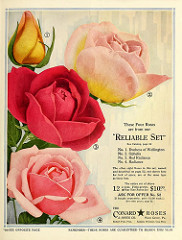

In [9]:
PIL.Image.open(str(roses[1]))

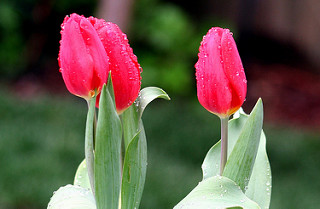

In [12]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[2]))

In [13]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'),
 PosixPath('datasets/flower_photos/roses/16149016979_23ef42b642_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7502389724_85b4a6c855_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [17]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/475936554_a2b38aaa8e.jpg'

In [21]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [22]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [24]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y_append = flowers_labels_dict[flower_name]


In [25]:
X = np.array(X)
y = np.array(y)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [28]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 19ms/step - loss: 1.3287 - accuracy: 0.4113
Epoch 2/30
86/86 [==============================] - 2s 20ms/step - loss: 0.9615 - accuracy: 0.6137
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7838 - accuracy: 0.7035
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.5809 - accuracy: 0.7929
Epoch 5/30
86/86 [==============================] - 2s 19ms/step - loss: 0.3802 - accuracy: 0.8677
Epoch 6/30
86/86 [==============================] - 2s 19ms/step - loss: 0.2068 - accuracy: 0.9313
Epoch 7/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0910 - accuracy: 0.9757
Epoch 8/30
86/86 [==============================] - 2s 19ms/step - loss: 0.0613 - accuracy: 0.9836
Epoch 9/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0407 - accuracy: 0.9906
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0477 - accuracy: 0.9862
Epoch 11/

In [29]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 2.6341 - accuracy: 0.6645


[2.6340813636779785, 0.6644880175590515]

In [30]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 0s 10ms/step


array([[ 15.436122  ,  27.884912  , -30.117975  ,   3.1433024 ,
          0.4711183 ],
       [  1.9395592 , -14.69824   ,  -2.2069833 ,  20.993132  ,
          3.785842  ],
       [  3.257118  ,  12.811035  ,  10.745551  , -13.636584  ,
         -2.8184845 ],
       ...,
       [ 10.449634  ,  -4.129222  , -10.233555  ,   0.5265899 ,
         19.009848  ],
       [ 12.246461  ,   0.39630938,  -2.9933426 , -12.235349  ,
         20.096226  ],
       [-13.035645  ,  -3.8706806 ,   0.7277365 ,  19.206774  ,
          1.8556391 ]], dtype=float32)

In [32]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.9224483e-06, 9.9999607e-01, 6.4515529e-26, 1.7982654e-11,
       1.2426219e-12], dtype=float32)>

In [33]:
np.argmax(score)

1

In [34]:
y_test[0]

1

In [36]:

img_height = 128
img_width = 128

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

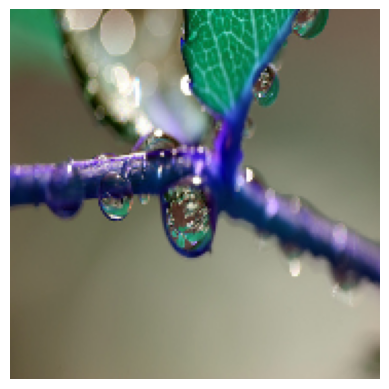

In [37]:
plt.axis('off')
plt.imshow(X[0])

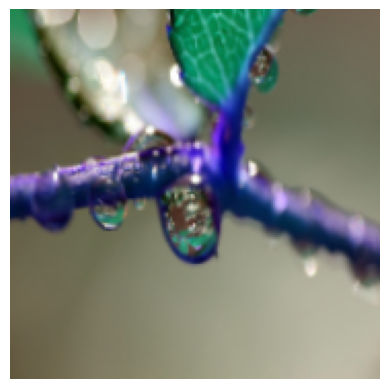

In [40]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [41]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 6s 28ms/step - loss: 1.3029 - accuracy: 0.4575
Epoch 2/30
86/86 [==============================] - 2s 27ms/step - loss: 1.0225 - accuracy: 0.5916
Epoch 3/30
86/86 [==============================] - 3s 31ms/step - loss: 0.9088 - accuracy: 0.6399
Epoch 4/30
86/86 [==============================] - 2s 27ms/step - loss: 0.8344 - accuracy: 0.6766
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7844 - accuracy: 0.6959
Epoch 6/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7467 - accuracy: 0.7169
Epoch 7/30
86/86 [==============================] - 2s 26ms/step - loss: 0.6964 - accuracy: 0.7398
Epoch 8/30
86/86 [==============================] - 2s 27ms/step - loss: 0.6545 - accuracy: 0.7453
Epoch 9/30
86/86 [==============================] - 2s 26ms/step - loss: 0.6586 - accuracy: 0.7496
Epoch 10/30
86/86 [==============================] - 2s 27ms/step - loss: 0.5993 - accuracy: 0.7762
Epoch 11/

In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 0s 11ms/step - loss: 1.0529 - accuracy: 0.7059


[1.0528578758239746, 0.7058823704719543]